In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta Google drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')
    
    DATOS_DIR = '/content/drive/MyDrive/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    DATOS_DIR = '../MIDUSI - Teoria/Datos/'          # carpeta donde se encuentran los datasets


Importamos las librerías y abrimos el archivo

In [2]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(DATOS_DIR + 'autos-mpg.csv', sep=';')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,ocho,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,ocho,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,ocho,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,ocho,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,ocho,3020,140.0,3449,105,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,cuatro,1400,86.0,2790,156,82,1,ford mustang gl
402,44.0,cuatro,9700,52.0,2130,246,82,2,vw pickup
403,32.0,cuatro,1350,84.0,2295,116,82,1,dodge rampage
404,28.0,cuatro,1200,79.0,2625,186,82,1,ford ranger


# Diagrama de Caja

### Diagrama de Caja de Tukey del atributo ACCELERATION 

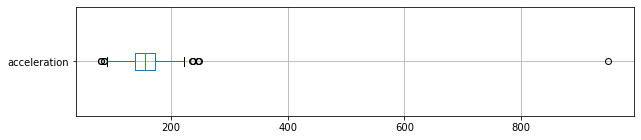

In [3]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 2))

# Trama el diagrama de caja
df.boxplot(column=['acceleration'], vert=False)

# Muestra el diagrama de caja
plt.show()


### Diagramas de Caja de Tukey del atributo ACELERATION agrupado por OPCION

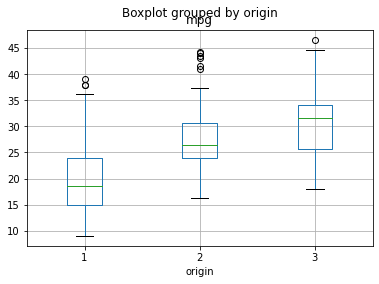

In [4]:
aux = df.boxplot(column=['mpg'], by='origin')


In [5]:
print("CUARTILES del atributo ACCELERATION")
Q = df["acceleration"].quantile([0.25, 0.5, 0.75]).values
print(Q)
print("\nQ1 = ", Q[0],"\nQ2 = ", Q[1],"\nQ3 = ", Q[2])


CUARTILES del atributo ACCELERATION
[137.25 155.   172.  ]

Q1 =  137.25 
Q2 =  155.0 
Q3 =  172.0


# Datos faltantes

Veamos si hay datos faltantes

In [6]:
print(df.isnull().sum())

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


### Completando datos faltantes

In [7]:
values = {'mpg': df['mpg'].mean(), 'horsepower': df['horsepower'].min()}
df.fillna(value=values, inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Como puede verse en la salida anterior, ya no quedan atributos con valores faltantes. Suponiendo que el atributo CYLINDERS tuviera valores faltantes y se quisiera completar con su moda debería ejecutar el siguiente código. En este caso, no tendrá efecto ya que el atributo CYLINDERS no tiene valores faltantes.

In [8]:
#-- completando un atributo nominal con su moda --

modaGen = df['cylinders'].mode()[0]

print("La MODA del atributo 'cylinders' es ", modaGen)

df['cylinders'] = df['cylinders'].replace(np.nan, modaGen)
df.isnull().sum()

La MODA del atributo 'cylinders' es  cuatro


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [9]:
def diagrama_de_barras(df, columna):
    """
    Genera un gráfico de barras de la columna especificada del DataFrame.
    
    Parámetros:
        df (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna a analizar.
    """
    barras = pd.value_counts(df[columna])
    plt.figure()
    N = len(barras)
    plt.bar(np.arange(N), barras)  # Gráfico de barras
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title('Discretización por Rango')
    # Colocamos las etiquetas del eje x
    plt.xticks(np.arange(N), barras.index)
    plt.show()

## Reducción de valores del atributo cylinders

Observando la frecuencia con la que aparecen los valores del atributo "cylinders" vemos que hay muy pocos autos con 3 o 5 cilindros. 

In [10]:
opciones = pd.value_counts(df['cylinders'])
opciones

cuatro    207
ocho      108
seis       84
tres        4
cinco       3
Name: cylinders, dtype: int64

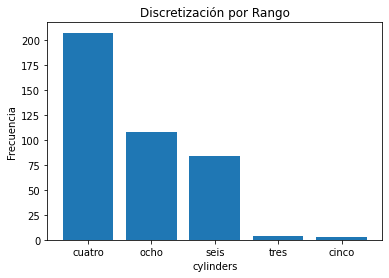

In [11]:
diagrama_de_barras(df, 'cylinders')

In [12]:
# Reemplazando valores
mapeo = {'cylinders': {'tres':'cuatro', 'cinco':'seis'}}
df.replace(mapeo, inplace=True)

#df['cylinders'] = df['cylinders'].replace(['cinco','seis', 'ocho'], 'mas_de_cuatro')

# revisar cómo quedó
opciones2 = pd.value_counts(df['cylinders'])
opciones2

cuatro    211
ocho      108
seis       87
Name: cylinders, dtype: int64

# Generando un nuevo atributo

Atributo decada
70s    316
80s     90
Name: decada, dtype: int64


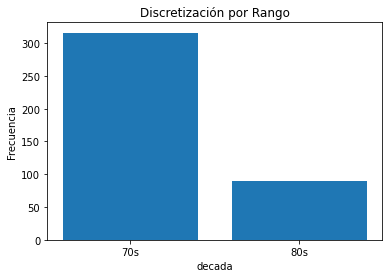

In [13]:
DEC = ['80s'] * len(df)
for i in range(len(df)):
    if df['model_year'][i] < 80:
        DEC[i] = '70s'
# Agregando un atributo al DataFrame
df = df.assign( decada = DEC )

print('Atributo decada')
print(pd.value_counts(df['decada']))

diagrama_de_barras(df, 'decada')

# Discretización

### Discretización por rango

bajo        147
medio       128
alto         90
muy alto     41
Name: weight2, dtype: int64


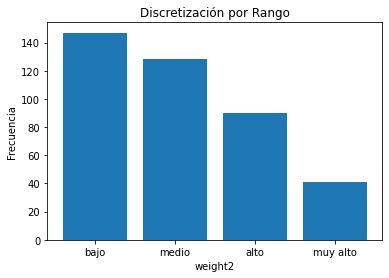

In [14]:
etiq = ["bajo","medio","alto", "muy alto"]

# Discretización por RANGO
columna = pd.cut(df["weight"],bins=len(etiq),labels=etiq)

df['weight2']= pd.Series.to_frame(columna)

print(pd.value_counts(df['weight2']))

df[["mpg","cylinders","displacement","horsepower","weight","weight2"]]

diagrama_de_barras(df,'weight2')

### Discretización por frecuencia

bajo        102
muy alto    102
medio       101
alto        101
Name: weight3, dtype: int64


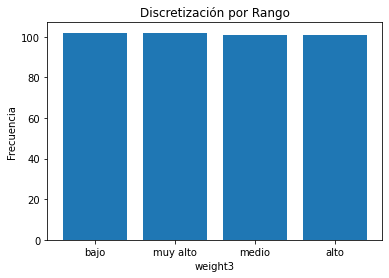

In [15]:
etiq = ["bajo","medio","alto","muy alto"]

columna = pd.qcut(df["weight"], q=len(etiq), labels=etiq)

df['weight3']= pd.Series.to_frame(columna)

#-- frecuencia con la que aparece cada valor
print(pd.value_counts(df['weight3']))

diagrama_de_barras(df,'weight3')

### Discretización indicada por el usuario

normal     192
liviano    121
pesado      93
Name: weight4, dtype: int64


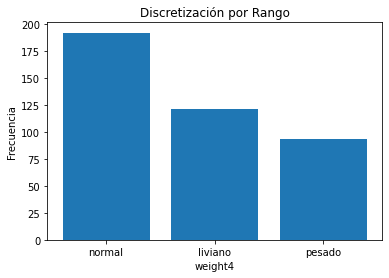

In [16]:
etiq = ["liviano","normal","pesado"]
valores = [-math.inf, 2300, 3700, math.inf]

columna = pd.cut(df["weight"],bins=valores,labels=etiq)

df['weight4']= pd.Series.to_frame(columna)

print(pd.value_counts(df['weight4']))

diagrama_de_barras(df,'weight4')

# Normalización

### Normalización lineal uniforme entre 0 y 1

In [17]:
att = "horsepower"
# -- Escala los valores entre 0 y 1 --
mini = df[att].min()
maxi = df[att].max()
df['attLineal']= (df[att]-mini)/(maxi-mini)

df[[att, 'attLineal']].describe()

,horsepower,attLineal
count,406.000000,406.000000
mean,104.209360,0.316355
std,39.136961,0.212701
min,46.000000,0.000000
25%,75.000000,0.157609
50%,93.500000,0.258152
75%,129.000000,0.451087
max,230.000000,1.000000


### Normalización usando media y desvío 

In [18]:
# -- Estandarización --
media = df[att].mean()
desvio = df[att].std()
df['attNorm']= (df[att]-media)/desvio

round(df[[att, 'attLineal', 'attNorm']].describe(),4)

,horsepower,attLineal,attNorm
count,406.0000,406.0000,406.0000
mean,104.2094,0.3164,-0.0000
std,39.1370,0.2127,1.0000
min,46.0000,0.0000,-1.4873
25%,75.0000,0.1576,-0.7463
50%,93.5000,0.2582,-0.2736
75%,129.0000,0.4511,0.6334
max,230.0000,1.0000,3.2141


<Figure size 2160x432 with 0 Axes>

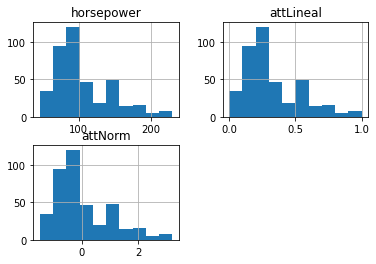

In [19]:
plt.figure(figsize=(30, 6))
df[[att,'attLineal','attNorm']].hist()
plt.show()

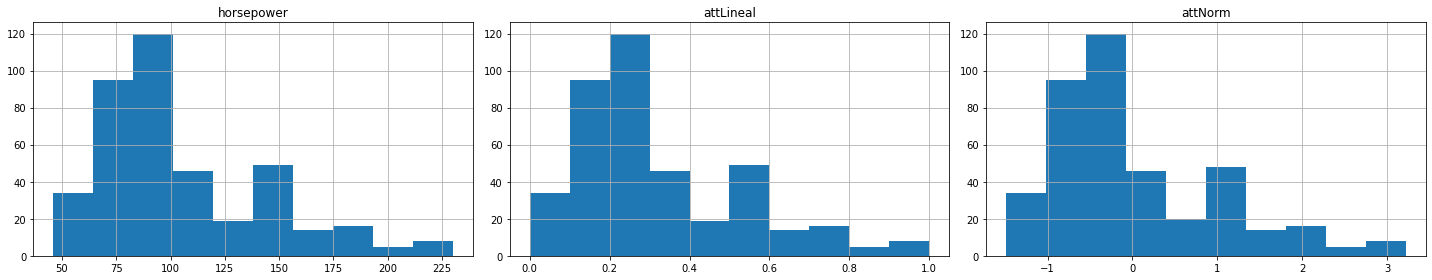

In [28]:
# Crear la figura y los subgráficos en una sola fila
fig, axes = plt.subplots(1, 3, figsize=(20,4))

# Generar los histogramas para cada columna
df[att].hist(ax=axes[0])  # Primer histograma
axes[0].set_title(f'{att}')

df['attLineal'].hist(ax=axes[1])  # Segundo histograma
axes[1].set_title('attLineal')

df['attNorm'].hist(ax=axes[2])  # Tercer histograma
axes[2].set_title('attNorm')

# Mostrar la gráfica
plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()

In [20]:
# -- elegimos algunas columnas numéricas

seleccion = df[["mpg","displacement","horsepower","weight","acceleration"]]
seleccion

,mpg,displacement,horsepower,weight,acceleration
0,18.0,3070,130.0,3504,120
1,15.0,3500,165.0,3693,115
2,18.0,3180,150.0,3436,110
3,16.0,3040,150.0,3433,120
4,17.0,3020,140.0,3449,105
...,...,...,...,...,...
401,27.0,1400,86.0,2790,156
402,44.0,9700,52.0,2130,246
403,32.0,1350,84.0,2295,116
404,28.0,1200,79.0,2625,186


### Normalización lineal de los atributos seleccionados

In [21]:
mini = seleccion.min()
maxi = seleccion.max()
seleccionNormLineal= (seleccion-mini)/(maxi-mini)
round(seleccionNormLineal,3)

,mpg,displacement,horsepower,weight,acceleration
0,0.239,0.235,0.457,0.536,0.046
1,0.160,0.284,0.647,0.590,0.040
2,0.239,0.248,0.565,0.517,0.034
3,0.186,0.232,0.565,0.516,0.046
4,0.213,0.230,0.511,0.521,0.029
...,...,...,...,...,...
401,0.479,0.045,0.217,0.334,0.087
402,0.931,0.989,0.033,0.147,0.191
403,0.612,0.040,0.207,0.193,0.041
404,0.505,0.023,0.179,0.287,0.122


### Normalización de los atributos seleccionados utilizando media y desvío

In [22]:
media = seleccion.mean()
desvio = seleccion.std()
seleccionNorm= (seleccion-media)/desvio
round(seleccionNorm,3)

,mpg,displacement,horsepower,weight,acceleration
0,-0.713,-0.275,0.659,0.619,-0.772
1,-1.100,-0.133,1.553,0.842,-0.876
2,-0.713,-0.239,1.170,0.539,-0.979
3,-0.971,-0.285,1.170,0.536,-0.772
4,-0.842,-0.291,0.914,0.554,-1.083
...,...,...,...,...,...
401,0.450,-0.825,-0.465,-0.224,-0.027
402,2.647,1.910,-1.334,-1.003,1.837
403,1.097,-0.841,-0.516,-0.808,-0.855
404,0.580,-0.891,-0.644,-0.418,0.594
